
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Alejandro Paz Usuga

Cédula: 1000105064


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

Forma de la señal 1: 8 63196
Numero de puntos de tiempo: 8
Numero de canales: 63196
Forma de la señal 2: 8 57974
Numero de puntos de tiempo: 8
Numero de canales: 57974


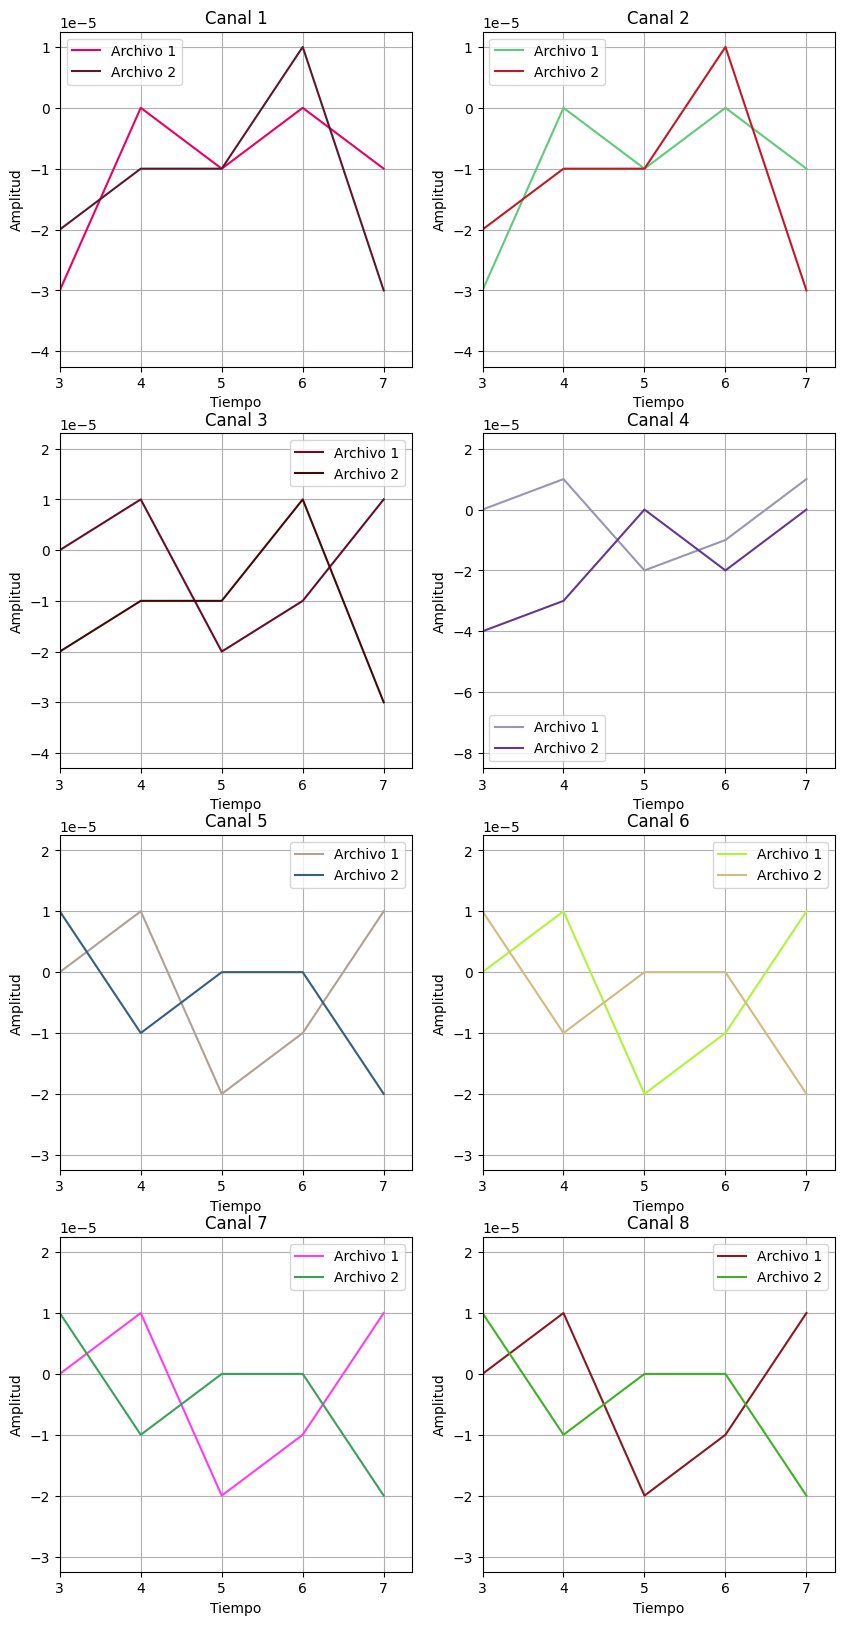

El valor maximo de cada canal en el archivo 1 es : [0.00127, 0.00127, 0.00127, 0.00127, 0.00127, 0.00127, 0.00127, 0.00127]
El valor maximo de cada canal en el archivo 2 es : [0.00112, 0.00127, 0.00069, 0.00119, 0.00127, 0.00086, 0.00077, 0.00105]


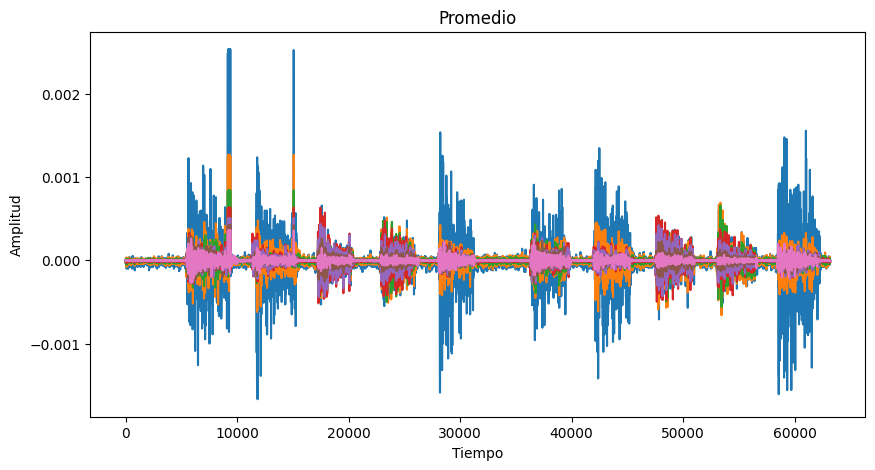

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random

class EMG:
    def __init__(self, Archivo1, Archivo2):
        self.Datos1=loadmat(Archivo1)['datos']
        self.Datos2=loadmat(Archivo2)['datos']
        self.tipoDatos=type(self.Datos1)
        self.Canales1= self.Datos1.shape[1]
        self.Canales2=self.Datos2.shape[1]
        self.Tiempos1=self.Datos1.shape[0]
        self.Tiempos2=self.Datos2.shape[0] 

    def mostrarDatos(self):
        print("Forma de la señal 1:", self.Tiempos1, self.Canales1)
        print("Numero de puntos de tiempo:",self.Tiempos1)
        print("Numero de canales:",self.Canales1)
        print("Forma de la señal 2:", self.Tiempos2, self.Canales2)
        print("Numero de puntos de tiempo:",self.Tiempos2)
        print("Numero de canales:",self.Canales2)

    def graficarArchivos(self,limiteenx):
        self.limiteenx=limiteenx
        numeroElectrodos = self.Tiempos1 // 2
        numeroGraficas = 2
        plt.figure(figsize=(10, 20))
        for i in range(self.Tiempos1):
            plt.subplot(numeroElectrodos, numeroGraficas, i+1)
            plt.plot(self.Datos1[:, i], label='Archivo 1', linewidth=1.5 , color=(random.random(), random.random(), random.random()), )
            plt.plot(self.Datos2[:, i], label='Archivo 2', linewidth=1.5 , color=(random.random(), random.random(), random.random()), )
            plt.title(f"Canal {i+1}")
            plt.xlabel("Tiempo")
            plt.ylabel("Amplitud")
            plt.grid(True)
            plt.legend()
            plt.xlim(limiteenx)
        plt.show()
    
    def valorMaximo(self):
        l1=[]
        l2=[]
        for i in range(self.Tiempos1):
           valorMaximo1 = np.max(self.Datos1[i,:])
           l1.append(valorMaximo1)
        for i in range(self.Tiempos2):
            valorMaximo2 = np.max(self.Datos2[i,:])
            l2.append(valorMaximo2)
        print("El valor maximo de cada canal en el archivo 1 es :",l1)
        print("El valor maximo de cada canal en el archivo 2 es :",l2)
        l1.clear()
        l2.clear()

    def lineaPromedio(self):
        plt.figure(figsize=(10,5))
        plt.subplot(1,1,1)
        for i in range(1, self.Tiempos1):
            promedio=(self.Datos1[i]+self.Datos1[i-1])/i
            plt.plot(promedio, label='Archivo 1' )
            plt.title("Promedio")
            plt.xlabel("Tiempo")
            plt.ylabel("Amplitud")
        plt.show()

x=EMG('archivo1.mat','archivo2.mat')   
x.mostrarDatos()
x.graficarArchivos(3)
x.valorMaximo()    
x.lineaPromedio()

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

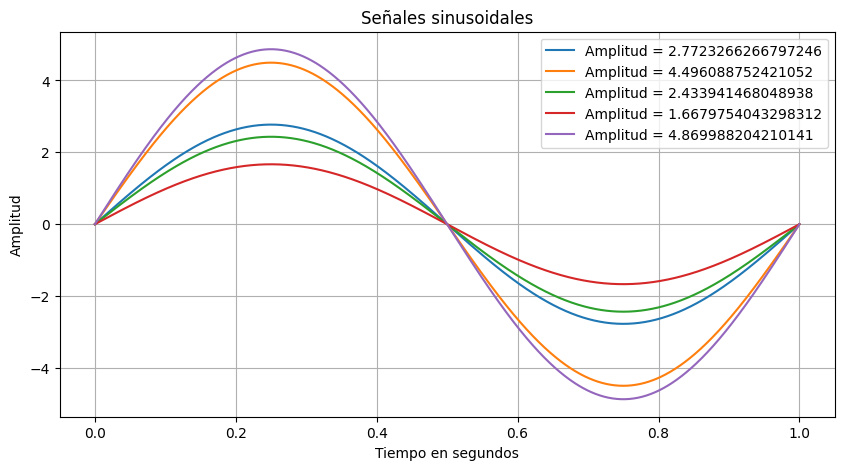

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Establecer los parámetros
frecuenciaSeñal=1
numeroMuestras=1000
rangoAmplitud=(1, 5)
numeroSeñales=5

# Generar los valores de tiempo
valoresTiempo=np.linspace(0, 1, numeroMuestras)

# Generar y graficar las señales
plt.figure(figsize=(10, 5))

for i in range(numeroSeñales):
    # Generar una amplitud aleatoria
    amplitudSeñal=np.random.uniform(*rangoAmplitud)
    
    # Generar la señal
    señal=amplitudSeñal*np.sin(2*np.pi*frecuenciaSeñal*valoresTiempo)
    
    # Graficar la señal
    plt.plot(valoresTiempo, señal, label=f"Amplitud = {amplitudSeñal}")

# Agregar etiquetas y título
plt.xlabel("Tiempo en segundos")
plt.ylabel("Amplitud")
plt.title("Señales sinusoidales")

# Agregar una leyenda
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [110]:
import pandas as pd

print("Conjunto de datos de dispositivos médicos cargado desde: datos_dispositivos.csv")
datosDispositivos = pd.read_csv('datos_dispositivos.csv')
print("Información básica del DataFrame:")
datosDispositivos.info()
Alto= datosDispositivos[(datosDispositivos['Clasificacion_riesgo']=='Alto')]
Moderado= datosDispositivos[(datosDispositivos['Clasificacion_riesgo']=='Moderado')]
Bajo= datosDispositivos[(datosDispositivos['Clasificacion_riesgo']=='Bajo')]
print("Dataframe de RIESGO ALTO ")

print(Alto)

print("Dataframe de  RIESGO MODERADO ")

print(Moderado)

print("Dataframe de RIESGO BAJO ")

print(Bajo)

x=[]
for i in datosDispositivos['Fabricante']:
    numfab=datosDispositivos[(datosDispositivos['Fabricante']==i)]
    x.append(numfab)
print("Primer fabricante : ",x[0])
print("Primer fabricante : ",x[1])
print("Primer fabricante : ",x[2])
print("Primer fabricante : ",x[3])

Conjunto de datos de dispositivos médicos cargado desde: datos_dispositivos.csv
Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    30 non-null     int64 
 1   Nombre_dispositivo    30 non-null     object
 2   Fabricante            30 non-null     object
 3   Clasificacion_riesgo  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
Dataframe de RIESGO ALTO 
    ID                 Nombre_dispositivo  Fabricante Clasificacion_riesgo
2    3                 Electrocardiograma  CardioTech                 Alto
5    6         Monitor de gases en sangre  CardioTech                 Alto
6    7      Bomba de insulina intravenosa  CardioTech                 Alto
14  15      Monitor de constantes vitales  CardioTech                 Alto
18  19  Bomba de infusión de medi

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**